# Project 2 - Data Science Workflow

This is the submission of: [Nate Manning]

"I worked on this assignment alone.”

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"     # to keep all output without use of print()

## PART 2: GET THE DATA

In [2]:
# Task 2a

df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
# Task 2b
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,1452-KIOVK,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
4,6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [4]:
# Task 2c
df.shape
df.info()
columns_list=list(df.columns)
for x in columns_list:
    df[x].value_counts()

(7046, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7046 non-null   object 
 1   gender            7045 non-null   object 
 2   SeniorCitizen     7045 non-null   float64
 3   Partner           7046 non-null   object 
 4   Dependents        7045 non-null   object 
 5   tenure            7045 non-null   float64
 6   PhoneService      7044 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7039 non-null   object 
 9   OnlineSecurity    7041 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7041 non-null   object 
 12  TechSupport       7037 non-null   object 
 13  StreamingTV       7040 non-null   object 
 14  StreamingMovies   7039 non-null   object 
 15  Contract          7036 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


3509-GWQGF    2
9967-ATRFS    2
9294-TDIPC    2
5997-OPVFA    2
9833-TGFHX    2
             ..
1231-YNDEK    1
7636-OWBPG    1
3745-HRPHI    1
5384-ZTTWP    1
8361-LTMKD    1
Name: customerID, Length: 7035, dtype: int64

Male      3558
Female    3487
Name: gender, dtype: int64

0.0    5902
1.0    1143
Name: SeniorCitizen, dtype: int64

No     3644
Yes    3402
Name: Partner, dtype: int64

No     4934
Yes    2111
Name: Dependents, dtype: int64

1.0     614
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
28.0     56
39.0     56
44.0     51
36.0     50
0.0      11
Name: tenure, Length: 73, dtype: int64

Yes    6363
No      681
Name: PhoneService, dtype: int64

No                  3389
Yes                 2973
No phone service     681
Name: MultipleLines, dtype: int64

Fiber optic    3094
DSL            2420
No             1525
Name: InternetService, dtype: int64

No                     3499
Yes                    2017
No internet service    1525
Name: OnlineSecurity, dtype: int64

No                     3091
Yes                    2427
No internet service    1525
Name: OnlineBackup, dtype: int64

No                     3098
Yes                    2420
No internet service    1523
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2040
No internet service    1524
Name: TechSupport, dtype: int64

No                     2812
Yes                    2703
No internet service    1525
Name: StreamingTV, dtype: int64

No                     2787
Yes                    2728
No internet service    1524
Name: StreamingMovies, dtype: int64

Month-to-month    3872
Two year          1695
One year          1469
Name: Contract, dtype: int64

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Electronic check             2367
Mailed check                 1611
Bank transfer (automatic)    1543
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

20.05     60
19.90     45
19.95     44
19.85     44
19.70     43
          ..
38.25      1
110.70     1
28.50      1
36.15      1
44.20      1
Name: MonthlyCharges, Length: 1590, dtype: int64

20.2       11
           11
19.75       9
19.9        8
19.65       8
           ..
1249.25     1
2475.35     1
1151.55     1
440.2       1
306.6       1
Name: TotalCharges, Length: 6524, dtype: int64

No     5167
Yes    1868
          5
          3
          3
Name: Churn, dtype: int64

## PART 3: DATA CLEANING 

In [5]:
# Task 3a
df.count()
df.isnull().sum(axis=0)
#churn has zero null values

customerID          7046
gender              7045
SeniorCitizen       7045
Partner             7046
Dependents          7045
tenure              7045
PhoneService        7044
MultipleLines       7043
InternetService     7039
OnlineSecurity      7041
OnlineBackup        7043
DeviceProtection    7041
TechSupport         7037
StreamingTV         7040
StreamingMovies     7039
Contract            7036
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7041
TotalCharges        7043
Churn               7046
dtype: int64

customerID           0
gender               1
SeniorCitizen        1
Partner              0
Dependents           1
tenure               1
PhoneService         2
MultipleLines        3
InternetService      7
OnlineSecurity       5
OnlineBackup         3
DeviceProtection     5
TechSupport          9
StreamingTV          6
StreamingMovies      7
Contract            10
PaperlessBilling     3
PaymentMethod        3
MonthlyCharges       5
TotalCharges         3
Churn                0
dtype: int64

In [6]:
# Task 3b
df['Churn'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.isnull().sum(axis=0)
#there are now 11 null values in the Churn column

customerID           0
gender               1
SeniorCitizen        1
Partner              0
Dependents           1
tenure               1
PhoneService         2
MultipleLines        3
InternetService      7
OnlineSecurity       5
OnlineBackup         3
DeviceProtection     5
TechSupport          9
StreamingTV          6
StreamingMovies      7
Contract            10
PaperlessBilling     3
PaymentMethod        3
MonthlyCharges       5
TotalCharges         3
Churn               11
dtype: int64

In [7]:
# Task 3c
df[['Churn', 'customerID']][df['Churn'].isnull()]
df.loc[:, ['Churn', 'customerID']][df.Churn.isnull()]
#Churn null value records, however there are no null values in customerID column

,Churn,customerID
251,NaN,6035-BXTTY
261,NaN,5160-UXJED
267,NaN,5229-DTFYB
302,NaN,7606-BPHHN
316,NaN,8111-BKVDS
341,NaN,5229-DTFYB
866,NaN,7129-ACFOG
1001,NaN,5624-RYAMH
1002,NaN,0196-JTUQI
1003,NaN,7130-YXBRO


,Churn,customerID
251,NaN,6035-BXTTY
261,NaN,5160-UXJED
267,NaN,5229-DTFYB
302,NaN,7606-BPHHN
316,NaN,8111-BKVDS
341,NaN,5229-DTFYB
866,NaN,7129-ACFOG
1001,NaN,5624-RYAMH
1002,NaN,0196-JTUQI
1003,NaN,7130-YXBRO


In [8]:
# Task 3d
df['Churn'].value_counts()
df=df.fillna({'Churn':'No'})
df['Churn'].value_counts()
#The number of No's increased from 5167 to 5178, increasing by 11

No     5167
Yes    1868
Name: Churn, dtype: int64

No     5178
Yes    1868
Name: Churn, dtype: int64

In [9]:
# Task 3e
df[df.isnull().sum(1)>1]
df.loc[:,:][df.isnull().sum(1)>1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
103,7850-VWJUU,Female,0.0,No,No,23.0,Yes,No,NaN,NaN,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.00,1778.5,No
116,9073-ZZIAY,Male,0.0,Yes,Yes,62.0,Yes,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,Two year,No,Electronic check,86.10,5215.25,No
117,3077-RSNTJ,Female,0.0,Yes,Yes,6.0,Yes,NaN,NaN,NaN,...,NaN,NaN,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,113.5,No
157,6348-SNFUS,Male,0.0,Yes,Yes,72.0,No,No phone service,DSL,NaN,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),55.45,4179.2,No
190,4075-JFPGR,Female,0.0,Yes,No,51.0,Yes,No,Fiber optic,Yes,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4619.55,No
191,3282-ZISZV,Male,0.0,No,Yes,32.0,Yes,Yes,DSL,No,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2633.3,No
197,7529-ZDFXI,Male,1.0,Yes,No,57.0,NaN,Yes,NaN,NaN,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.85,4925.35,No
282,5686-CMAWK,NaN,NaN,No,No,17.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,NaN,NaN,NaN,86.75,1410.25,No
290,9774-NRNAU,Male,1.0,Yes,No,27.0,Yes,Yes,DSL,No,...,Yes,NaN,NaN,NaN,Month-to-month,Yes,Bank transfer (automatic),84.80,2309.55,No
320,4360-PNRQB,Male,0.0,No,NaN,NaN,NaN,NaN,NaN,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.60,1395.05,No


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
103,7850-VWJUU,Female,0.0,No,No,23.0,Yes,No,NaN,NaN,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.00,1778.5,No
116,9073-ZZIAY,Male,0.0,Yes,Yes,62.0,Yes,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,Two year,No,Electronic check,86.10,5215.25,No
117,3077-RSNTJ,Female,0.0,Yes,Yes,6.0,Yes,NaN,NaN,NaN,...,NaN,NaN,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,113.5,No
157,6348-SNFUS,Male,0.0,Yes,Yes,72.0,No,No phone service,DSL,NaN,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),55.45,4179.2,No
190,4075-JFPGR,Female,0.0,Yes,No,51.0,Yes,No,Fiber optic,Yes,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4619.55,No
191,3282-ZISZV,Male,0.0,No,Yes,32.0,Yes,Yes,DSL,No,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2633.3,No
197,7529-ZDFXI,Male,1.0,Yes,No,57.0,NaN,Yes,NaN,NaN,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.85,4925.35,No
282,5686-CMAWK,NaN,NaN,No,No,17.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,NaN,NaN,NaN,86.75,1410.25,No
290,9774-NRNAU,Male,1.0,Yes,No,27.0,Yes,Yes,DSL,No,...,Yes,NaN,NaN,NaN,Month-to-month,Yes,Bank transfer (automatic),84.80,2309.55,No
320,4360-PNRQB,Male,0.0,No,NaN,NaN,NaN,NaN,NaN,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.60,1395.05,No


In [10]:
# Task 3f
df.shape
values=list(df.loc[df.isnull().sum(1)>1].index)
df.drop(values, inplace=True)
df.shape
#dropped 17 records of multiple missing values

(7046, 21)

(7029, 21)

In [11]:
# Task 3g
df.shape
df.drop_duplicates(inplace=True)
df.shape
#dropped 11 rows

(7029, 21)

(7018, 21)

In [12]:
# Task 3h
df.loc[df['OnlineSecurity']=='No internet service', 'OnlineSecurity']=np.nan
df.loc[df['OnlineBackup']=='No internet service', 'OnlineBackup']=np.nan
df.loc[df['DeviceProtection']=='No internet service', 'DeviceProtection']=np.nan
df.loc[df['TechSupport']=='No internet service', 'TechSupport']=np.nan
df.loc[df['StreamingTV']=='No internet service', 'StreamingTV']=np.nan
df.loc[df['StreamingMovies']=='No internet service', 'StreamingMovies']=np.nan
#changed No internet service values to nan

In [13]:
# Task 3i
df.loc[df['PaymentMethod']=='Bank transfer (automatic)', 'PaymentMethod']='Automatic'
df.loc[df['PaymentMethod']=='Credit card (automatic)', 'PaymentMethod']='Automatic'
df['PaymentMethod'].value_counts()

Automatic           3053
Electronic check    2358
Mailed check        1607
Name: PaymentMethod, dtype: int64

In [14]:
# Task 3j
df.set_index('customerID', inplace=True)
df.index.name='CustID'
df.head()
#setting the explicit row index to customerID

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Automatic,42.30,1840.75,No
1452-KIOVK,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Automatic,89.10,1949.4,No
6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


<AxesSubplot:title={'center':'MonthlyCharges'}, xlabel='Churn'>

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustID,,,,,,,,,,,,,,,,,,,,
7764-BDPEE,Male,0.0,No,Yes,3.0,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,No,Mailed check,22220.85,60.65,No
2812-REYAT,Female,0.0,Yes,No,49.0,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,One year,Yes,Automatic,22220.05,923.1,No
8039-ACLPL,Female,0.0,Yes,Yes,72.0,Yes,No,DSL,Yes,Yes,Yes,No,No,Yes,Two year,No,Automatic,7868.75,4888.2,No
9450-TRJUU,Male,0.0,No,No,35.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,983.15,2848.45,No
7569-NMZYQ,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Automatic,118.75,8672.45,No
8984-HPEMB,Female,0.0,No,No,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.6,No
5989-AXPUC,Female,0.0,Yes,No,68.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
5734-EJKXG,Female,0.0,No,No,61.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.7,No
8199-ZLLSA,Male,0.0,No,No,67.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Automatic,118.35,7804.15,Yes


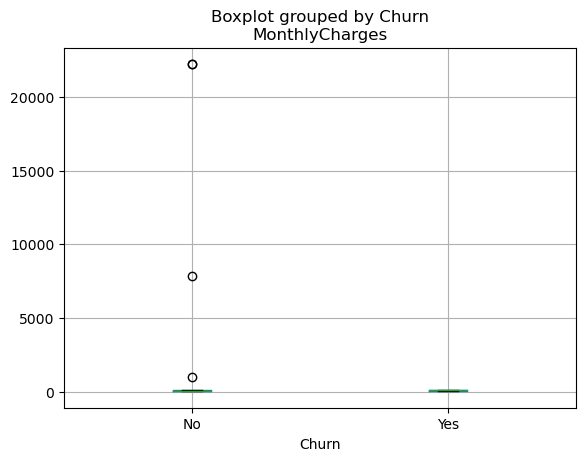

In [15]:
# Task 3k
df.boxplot(column = 'MonthlyCharges', by='Churn')
df.nlargest(10, "MonthlyCharges")

In [16]:
# Task 3l
def ceilingcap(num):
    if num>118.75:
        return 118.75
    else:
        return num
df['MonthlyCharges'] = df['MonthlyCharges'].apply(ceilingcap)
df.nlargest(10, "MonthlyCharges")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustID,,,,,,,,,,,,,,,,,,,,
9450-TRJUU,Male,0.0,No,No,35.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,118.75,2848.45,No
7764-BDPEE,Male,0.0,No,Yes,3.0,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,No,Mailed check,118.75,60.65,No
8039-ACLPL,Female,0.0,Yes,Yes,72.0,Yes,No,DSL,Yes,Yes,Yes,No,No,Yes,Two year,No,Automatic,118.75,4888.2,No
2812-REYAT,Female,0.0,Yes,No,49.0,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,One year,Yes,Automatic,118.75,923.1,No
7569-NMZYQ,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Automatic,118.75,8672.45,No
8984-HPEMB,Female,0.0,No,No,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.6,No
5989-AXPUC,Female,0.0,Yes,No,68.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
5734-EJKXG,Female,0.0,No,No,61.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.7,No
8199-ZLLSA,Male,0.0,No,No,67.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Automatic,118.35,7804.15,Yes


<AxesSubplot:title={'center':'MonthlyCharges'}, xlabel='Churn'>

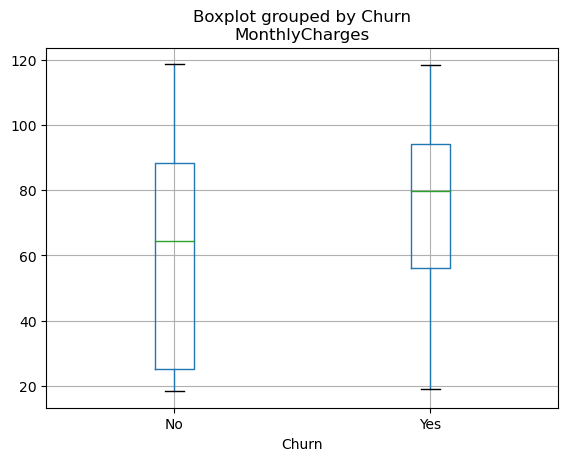

In [17]:
# Task 3m
df.boxplot(column = 'MonthlyCharges', by='Churn')


In [18]:
# Task 3n
df.shape
df.dtypes
df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
values=list(df[df['TotalCharges'].isnull()].index)
df.drop(values, inplace=True)
df.shape
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dtypes
def thecheck(value):
    if (value['TotalCharges']<=((1.075)*(value['tenure']*value['MonthlyCharges']))) and (value['TotalCharges']>=((0.925)*(value['tenure']*value['MonthlyCharges']))):
        return True
    else:
        return False
df['checker'] = df.apply(thecheck, axis=1)
df.drop(df.index[df.checker==False], inplace=True)
df.drop('checker', axis=1, inplace=True)
df.shape

(7018, 20)

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

(7007, 20)

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

(6290, 20)

## PART 4: DATA EXPLORATION 

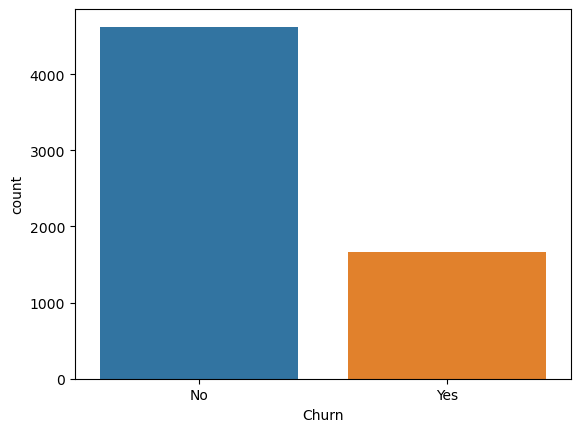

In [19]:
# Task 4a
churnplot=sns.countplot(data=df, x='Churn')


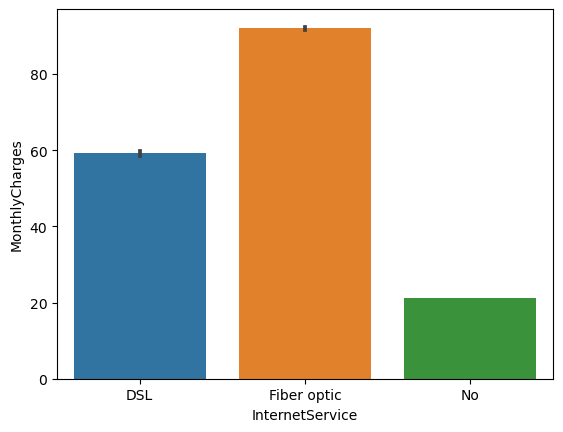

In [20]:
# Task 4b
MonthlyChargeComparison = sns.barplot(data=df, x='InternetService', y='MonthlyCharges')


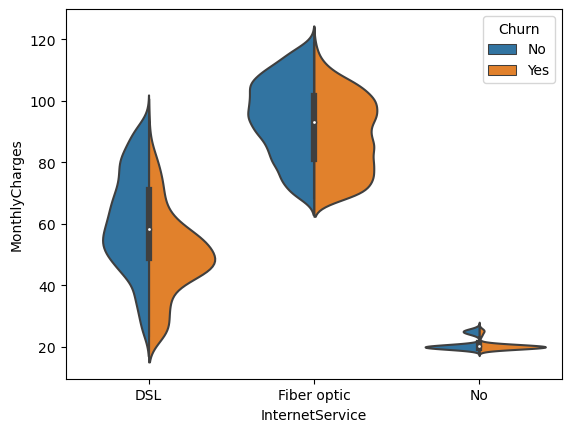

In [21]:
# Task 4c
MonthlyChargeComparison = sns.violinplot(data=df, x='InternetService', y='MonthlyCharges', hue='Churn', split=True)


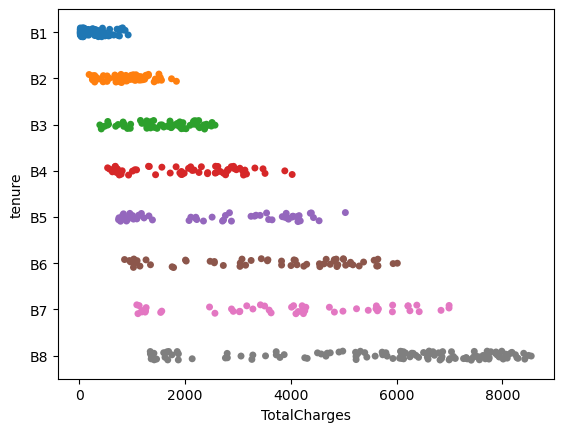

In [22]:
# Task 4d
dfS = df.sample(frac=0.1)
binnies=pd.cut(x=dfS['tenure'], bins=8, labels=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8'])
Strippy = sns.stripplot(data=dfS, x='TotalCharges', y=binnies)


In [23]:
# Task 4e
import math
from math import sqrt
def monthlychargesqrt(value):
    value=math.sqrt(value)
    return value
df['monthlychargesqrt'] = df['MonthlyCharges'].apply(monthlychargesqrt)

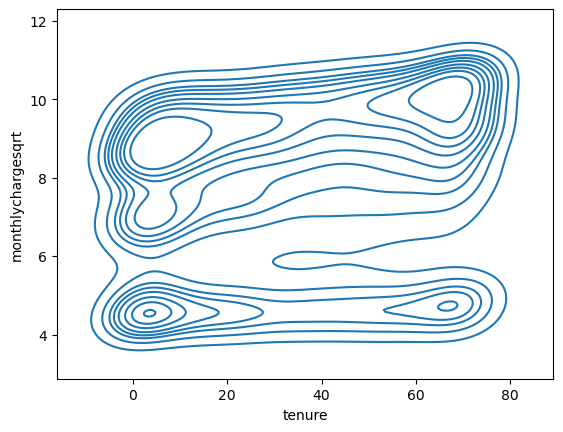

In [24]:
# Task #4f
MonthlyChargeComparison = sns.kdeplot(data=df, x='tenure', y='monthlychargesqrt')


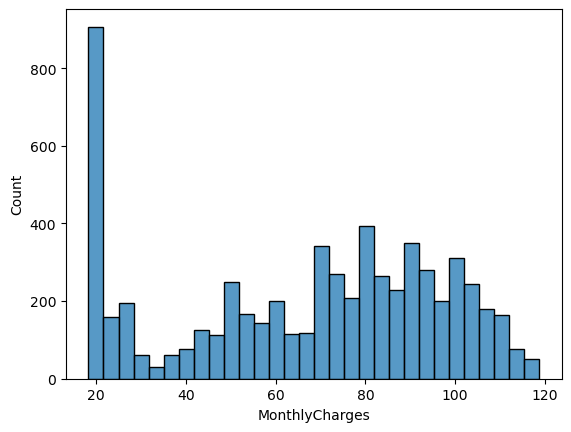

In [25]:
# Task 4g
MonthlyChargeCount = sns.histplot(data=df, x='MonthlyCharges', bins=30)


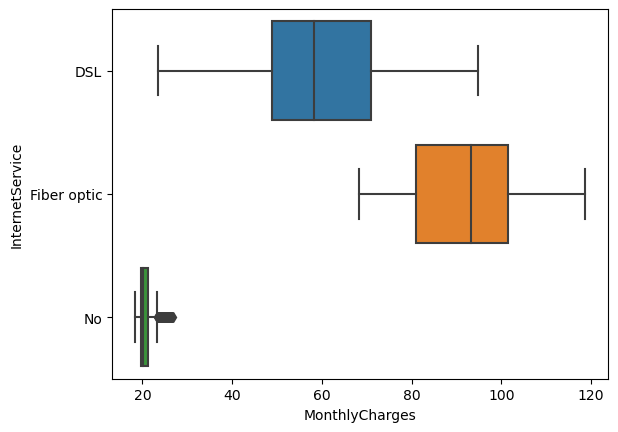

In [26]:
# Task 4h
MonthlyChargeComparisonIS = sns.boxplot(data=df, x='MonthlyCharges', y='InternetService')

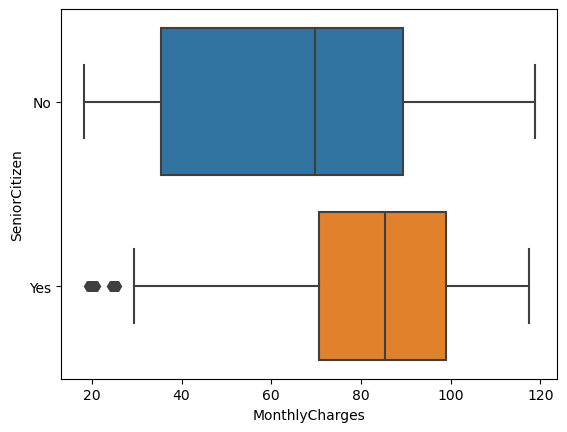

In [27]:
# Task 4h
def transition(value):
    if value == 1.0:
        value='Yes'
    else:
        value='No'
    return value
df['SeniorCitizen'] = df['SeniorCitizen'].apply(transition)
MonthlyChargeComparisonSC = sns.boxplot(data=df, x='MonthlyCharges', y='SeniorCitizen')

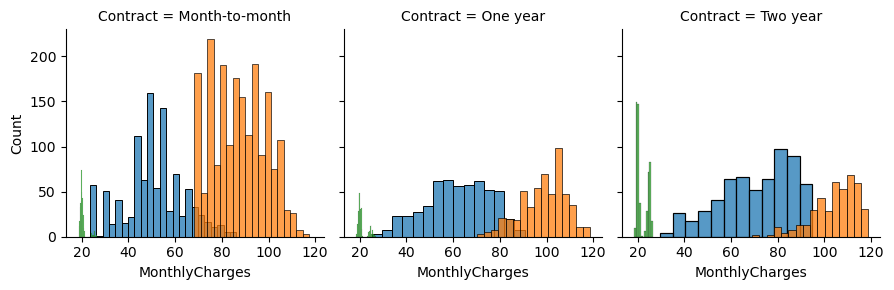

In [28]:
# Task 4i
g = sns.FacetGrid(data=df, col='Contract', hue='InternetService')
g.map_dataframe(sns.histplot, x='MonthlyCharges')


## PART 5: DATA TRANSFORMATION 

72

100.0

100.0

<Figure size 2500x1600 with 0 Axes>

[Text(0.0, 0, 'zero'), Text(36.0, 0, 'middle'), Text(72.0, 0, 'max')]

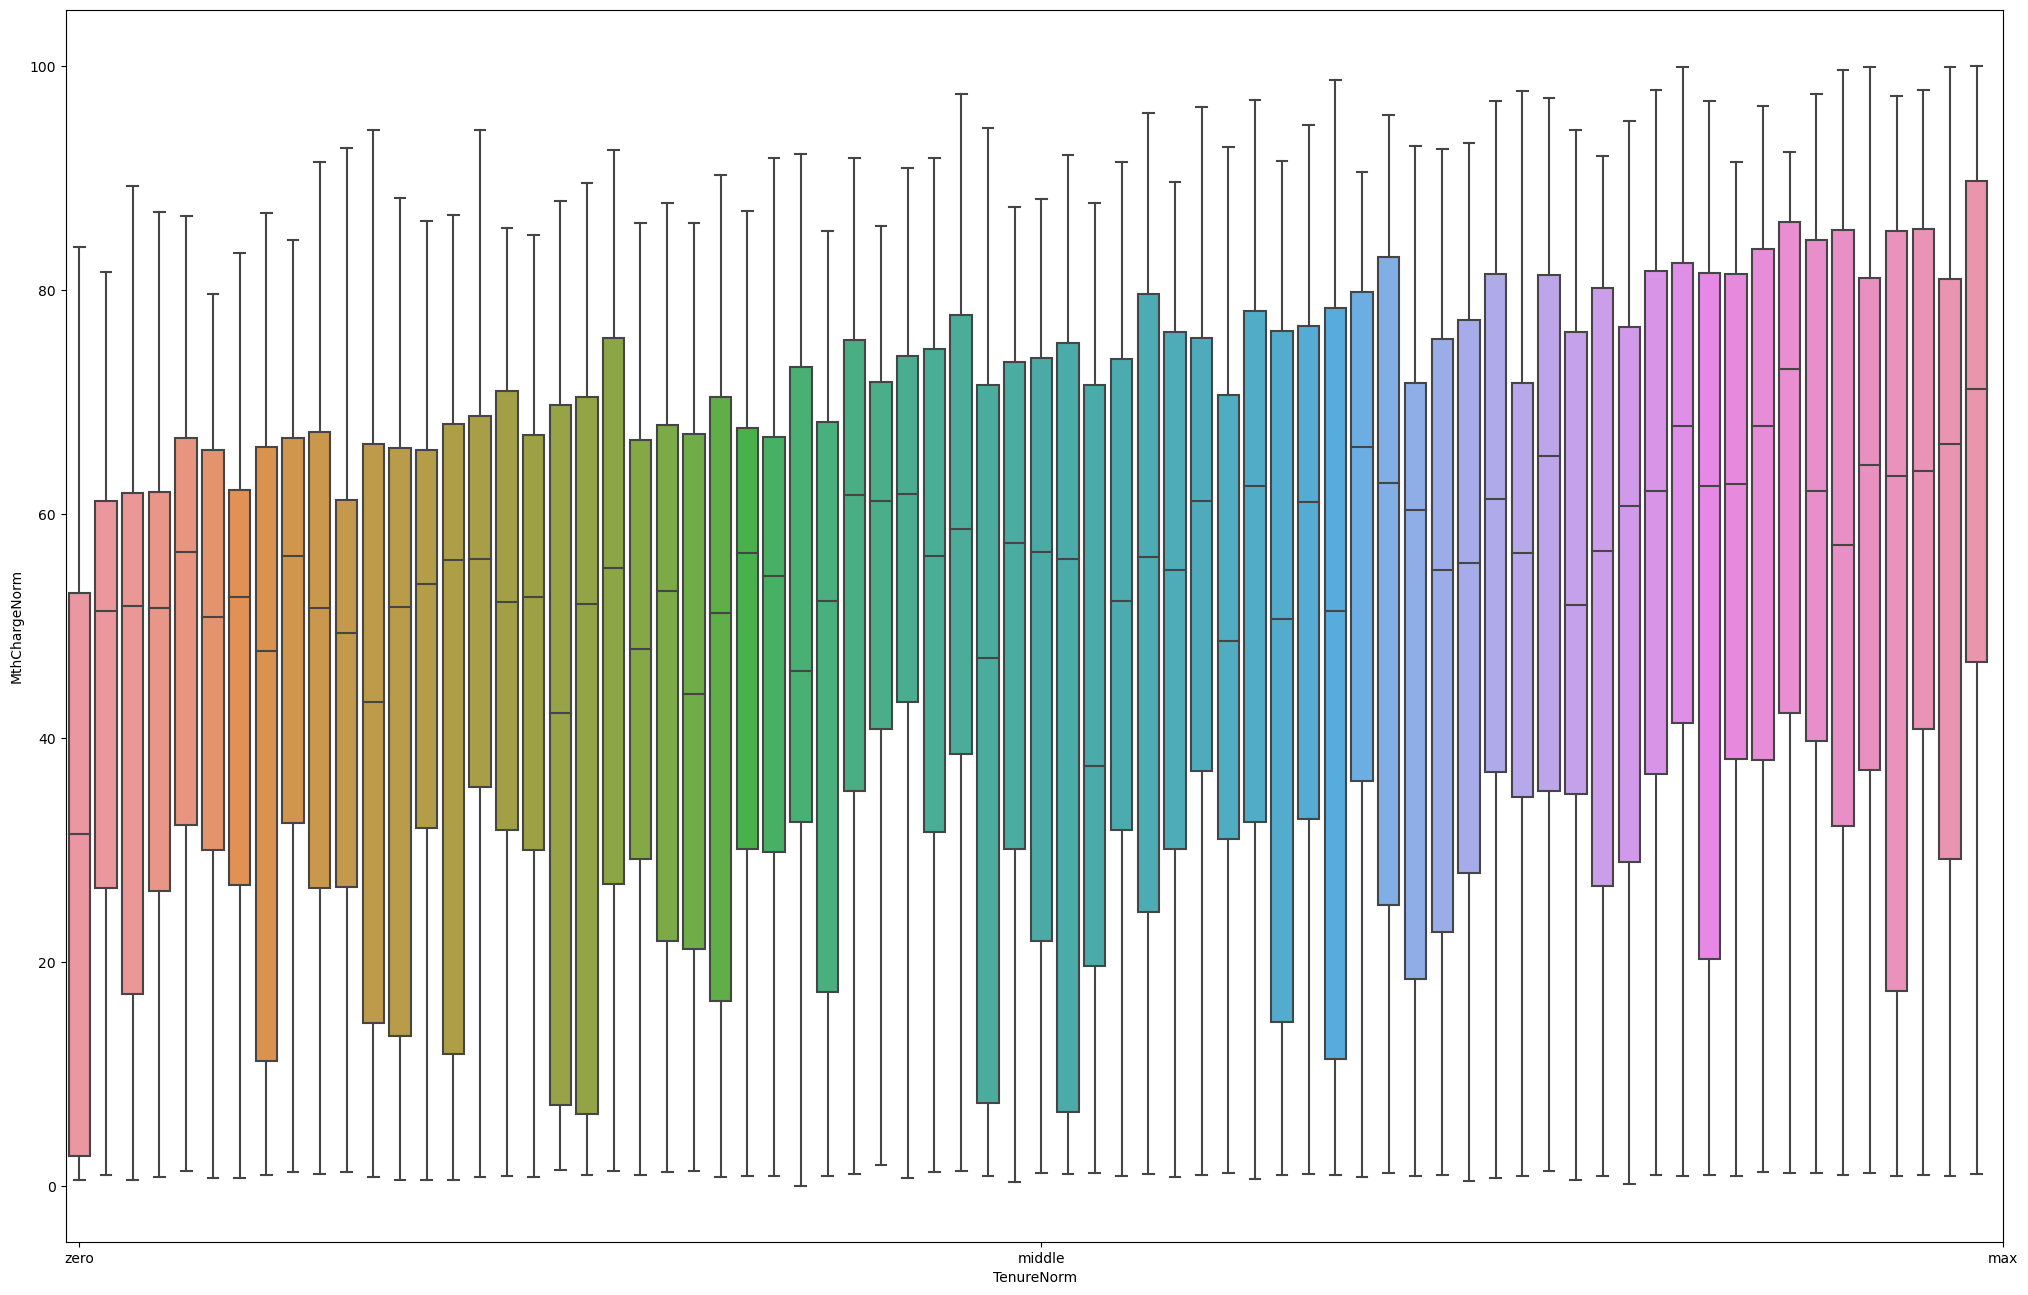

In [29]:
# Task 5a
df['TenureNorm'] = ((df['tenure']-df['tenure'].min())/(df['tenure'].max()-df['tenure'].min())*100)
df['MthChargeNorm'] = ((df['MonthlyCharges']-df['MonthlyCharges'].min())/(df['MonthlyCharges'].max()-df['MonthlyCharges'].min())*100)
len(pd.unique(df['TenureNorm']))
df['MthChargeNorm'].max()
df['TenureNorm'].max()
plt.figure(figsize=(25,16))
MonthlyTenureComparison = sns.boxplot(data=df, x='TenureNorm', y='MthChargeNorm')
MonthlyTenureComparison.set_xticks([0, len(pd.unique(df['TenureNorm']))/2, 72])
MonthlyTenureComparison.set_xticklabels(['zero', 'middle', 'max'])

/var/folders/9k/_bqxbd_d4tnd1zrm0v_x930c0000gn/T/ipykernel_35640/3619915606.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('tenure', axis=1, inplace=True)


gender                 object
SeniorCitizen          object
Partner                object
Dependents             object
TenureCat            category
PhoneService           object
MultipleLines          object
InternetService        object
OnlineSecurity         object
OnlineBackup           object
DeviceProtection       object
TechSupport            object
StreamingTV            object
StreamingMovies        object
Contract               object
PaperlessBilling       object
PaymentMethod          object
MonthlyCharges        float64
TotalCharges          float64
Churn                  object
monthlychargesqrt     float64
TenureNorm            float64
MthChargeNorm         float64
dtype: object

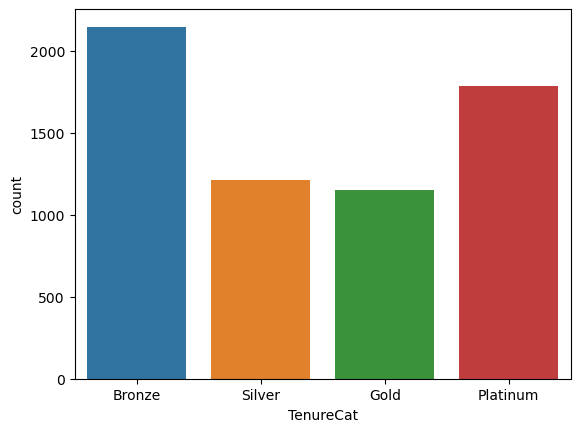

In [30]:
# Task 5b
df['TenureCat']=pd.cut(x=df['tenure'], bins=4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])
df = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'TenureCat',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'monthlychargesqrt',
       'TenureNorm', 'MthChargeNorm']]
TenureCatPlot = sns.countplot(data=df, x='TenureCat')
df.drop('tenure', axis=1, inplace=True)
df.dtypes


In [31]:
# Task 5c
TenureGroups = df.groupby(['TenureCat', 'Contract'])['Contract'].count()
TenureGroups.to_frame()
TenureGroups.reset_index(name='Count')

Contract
TenureCat Contract                
Bronze    Month-to-month      1944
          One year             141
          Two year              57
Silver    Month-to-month       753
          One year             328
          Two year             128
Gold      Month-to-month       434
          One year             428
          Two year             286
Platinum  Month-to-month       217
          One year             454
          Two year            1115

,TenureCat,Contract,Count
0,Bronze,Month-to-month,1944
1,Bronze,One year,141
2,Bronze,Two year,57
3,Silver,Month-to-month,753
4,Silver,One year,328
5,Silver,Two year,128
6,Gold,Month-to-month,434
7,Gold,One year,428
8,Gold,Two year,286
9,Platinum,Month-to-month,217


In [32]:
# Task 5d
MthChargeMean = df.groupby(['InternetService', 'TenureCat'])['MonthlyCharges'].mean().reset_index (name='MonthlyChargesMean')
MthChargeMean

,InternetService,TenureCat,MonthlyChargesMean
0,DSL,Bronze,50.074650
1,DSL,Silver,57.465707
2,DSL,Gold,60.300744
3,DSL,Platinum,69.618260
4,Fiber optic,Bronze,83.194225
5,Fiber optic,Silver,90.389664
6,Fiber optic,Gold,95.525720
7,Fiber optic,Platinum,101.704785
8,No,Bronze,20.376850
9,No,Silver,20.889159


In [33]:
# Task 5e
TenureCatMean = df.groupby(['TenureCat', 'Contract'])['MonthlyCharges'].mean().reset_index(name='MonthlyChargesMean')
TenureCatMean['MonthlyChargesMean'] = TenureCatMean['MonthlyChargesMean'].round(2)
TenureCatMean

,TenureCat,Contract,MonthlyChargesMean
0,Bronze,Month-to-month,61.93
1,Bronze,One year,43.00
2,Bronze,Two year,32.25
3,Silver,Month-to-month,74.22
4,Silver,One year,57.33
5,Silver,Two year,40.22
6,Gold,Month-to-month,79.89
7,Gold,One year,69.72
8,Gold,Two year,50.17
9,Platinum,Month-to-month,87.80


## PART 8: FEATURE ENGINEERING

In [34]:
# Task 8a
df.shape
def TechSavvyCol(value):
    if (value['OnlineSecurity']=='Yes') & (value['OnlineBackup']=='Yes') & (value['InternetService']=='DSL'):
        value='high'
    elif (value['OnlineSecurity']=='Yes') & (value['OnlineBackup']=='No') & (value['InternetService']=='DSL'):
        value='medium'
    elif (value['InternetService']=='No'):
        value='UK'
    else:
        value='low'
    return value
df['Techsavvy']=df.apply(TechSavvyCol, axis=1)
values=list(df[df['Techsavvy']=='UK'].index)
df.drop(values, inplace=True)
df.shape
df.dropna(inplace=True)
df.shape
df['Techsavvy'] = df['Techsavvy'].astype('category')
df.dtypes

(6290, 23)

(5088, 24)

(5082, 24)

gender                 object
SeniorCitizen          object
Partner                object
Dependents             object
TenureCat            category
PhoneService           object
MultipleLines          object
InternetService        object
OnlineSecurity         object
OnlineBackup           object
DeviceProtection       object
TechSupport            object
StreamingTV            object
StreamingMovies        object
Contract               object
PaperlessBilling       object
PaymentMethod          object
MonthlyCharges        float64
TotalCharges          float64
Churn                  object
monthlychargesqrt     float64
TenureNorm            float64
MthChargeNorm         float64
Techsavvy            category
dtype: object

In [35]:
# Task 8b
def Streamer(value):
    if (value['StreamingTV']=='Yes') & (value['StreamingMovies']=='Yes') & (value['InternetService']=='DSL'):
        value='streamer'
    else:
        value='non-streamer'
    return value
df['Streamer']=df.apply(Streamer, axis=1)
df.drop(['InternetService', 'StreamingTV', 'StreamingMovies'], axis=1, inplace=True)
df.head(10)
df.columns
df['Streamer'].value_counts()
df['Streamer'] = df['Streamer'].astype('category')
df.to_csv('thecsv.csv',index=False)

,gender,SeniorCitizen,Partner,Dependents,TenureCat,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthlychargesqrt,TenureNorm,MthChargeNorm,Techsavvy,Streamer
CustID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,Bronze,No,No phone service,No,Yes,No,...,Yes,Electronic check,29.85,29.85,No,5.463515,0.000000,11.542289,low,non-streamer
5575-GNVDE,Male,No,No,No,Silver,Yes,No,Yes,No,Yes,...,No,Mailed check,56.95,1889.50,No,7.546522,46.478873,38.507463,medium,non-streamer
7795-CFOCW,Male,No,No,No,Gold,No,No phone service,Yes,No,Yes,...,No,Automatic,42.30,1840.75,No,6.503845,61.971831,23.930348,medium,non-streamer
1452-KIOVK,Male,No,No,Yes,Silver,Yes,Yes,No,Yes,No,...,Yes,Automatic,89.10,1949.40,No,9.439280,29.577465,70.497512,low,non-streamer
6713-OKOMC,Female,No,No,No,Bronze,No,No phone service,Yes,No,No,...,No,Mailed check,29.75,301.90,No,5.454356,12.676056,11.442786,medium,non-streamer
6388-TABGU,Male,No,No,Yes,Platinum,Yes,No,Yes,Yes,No,...,No,Automatic,56.15,3487.95,No,7.493330,85.915493,37.711443,high,non-streamer
8091-TTVAX,Male,No,Yes,No,Platinum,Yes,Yes,No,No,Yes,...,No,Automatic,100.35,5681.10,No,10.017485,80.281690,81.691542,low,non-streamer
5129-JLPIS,Male,No,No,No,Silver,Yes,No,Yes,No,Yes,...,Yes,Electronic check,105.50,2686.05,No,10.271319,33.802817,86.815920,low,non-streamer
3655-SNQYZ,Female,No,Yes,Yes,Platinum,Yes,Yes,Yes,Yes,Yes,...,No,Automatic,113.25,7895.15,No,10.641898,95.774648,94.527363,low,non-streamer


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'TenureCat',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'monthlychargesqrt', 'TenureNorm', 'MthChargeNorm', 'Techsavvy',
       'Streamer'],
      dtype='object')

non-streamer    4483
streamer         599
Name: Streamer, dtype: int64

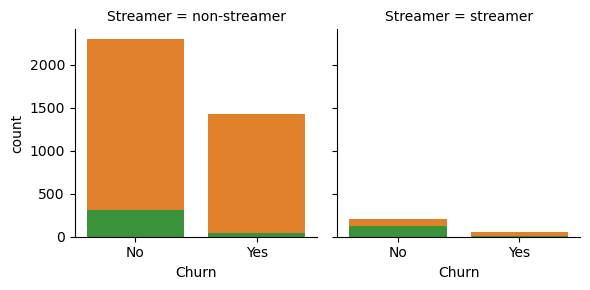

In [36]:
# Task 8c
g = sns.FacetGrid(data=df, col='Streamer', hue='Techsavvy')
g.map_dataframe(sns.countplot, x='Churn')

In [37]:
#8d
df['PaymentMethod'] = df['PaymentMethod'].astype('category')
def rewriter(value):
    if value=='Yes':
        value=0
    if value=='No':
        value=1
    return value
df['Churn']=df['Churn'].apply(rewriter)
df = pd.get_dummies(df, columns=['Streamer', 'Techsavvy', 'TenureCat', 'PaymentMethod'])
df.columns
X = df[['Streamer_non-streamer', 'Streamer_streamer',
       'Techsavvy_high', 'Techsavvy_low', 'Techsavvy_medium',
       'TenureCat_Bronze', 'TenureCat_Silver', 'TenureCat_Gold',
       'TenureCat_Platinum', 'PaymentMethod_Automatic',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MonthlyCharges']]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'monthlychargesqrt', 'TenureNorm',
       'MthChargeNorm', 'Streamer_non-streamer', 'Streamer_streamer',
       'Techsavvy_high', 'Techsavvy_low', 'Techsavvy_medium',
       'TenureCat_Bronze', 'TenureCat_Silver', 'TenureCat_Gold',
       'TenureCat_Platinum', 'PaymentMethod_Automatic',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

## PART 9: FEATURE SELECT & FEATURE IMPORTANCE

## PART 10: MODELING

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = df[['Streamer_non-streamer', 'Streamer_streamer',
       'Techsavvy_high', 'Techsavvy_low', 'Techsavvy_medium',
       'TenureCat_Bronze', 'TenureCat_Silver', 'TenureCat_Gold',
       'TenureCat_Platinum', 'PaymentMethod_Automatic',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=42) 

logreg = LogisticRegression()
logreg.fit(X_train, y_train) #This is where the training is taking place
y_pred_logreg = logreg.predict(X_test) #Making predictions to test the model on test data
print('Logistic Regression Train accuracy %s' % logreg.score(X_train, y_train)) #Train accuracy
#Logistic Regression Train accuracy 0.8333333333333334
print('Logistic Regression Test accuracy %s' % accuracy_score(y_pred_logreg, y_test)) #Test accuracy
#Logistic Regression Test accuracy 0.5
print(confusion_matrix(y_test, y_pred_logreg)) #Confusion matrix
print(classification_report(y_test, y_pred_logreg)) #Classification Report


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logistic Regression Train accuracy 0.75729747458183
Logistic Regression Test accuracy 0.751106738809641
[[ 305  326]
 [ 180 1222]]
              precision    recall  f1-score   support

           0       0.63      0.48      0.55       631
           1       0.79      0.87      0.83      1402

    accuracy                           0.75      2033
   macro avg       0.71      0.68      0.69      2033
weighted avg       0.74      0.75      0.74      2033

